In [6]:
from importlib import reload
from PIL import Image
import argparse
import numpy as np
import model.ngp as ngp
import torch
import main
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image_path = 'kodim01t.jpg'
img = np.array(Image.open(image_path)) / 255.

In [3]:
reload(ngp);
render, losses = ngp.fit_img(img)

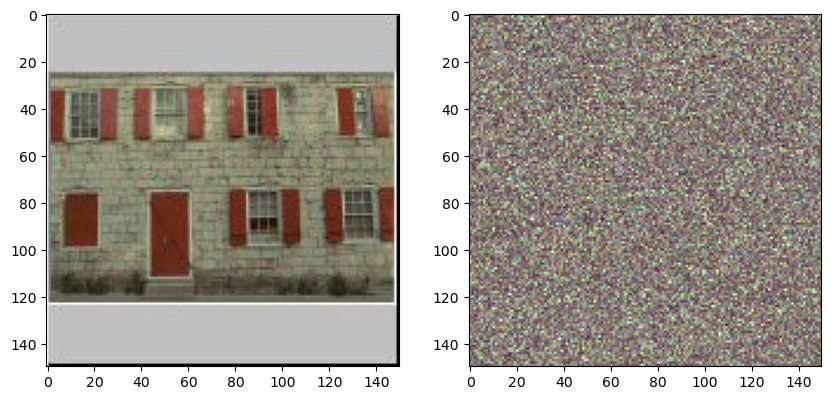

In [17]:
fig = plt.figure(figsize=(10, 20))
fig.add_subplot(1, 2, 1)
plt.imshow(img)
fig.add_subplot(1, 2, 2)
plt.imshow(render.clamp(0,1).detach().numpy());

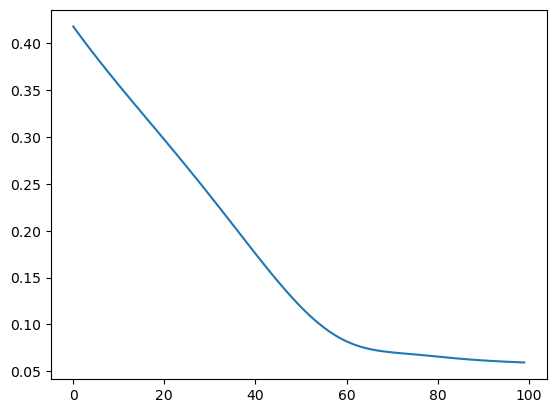

In [7]:
plt.plot(losses);

In [46]:
N, F = 8000, 2
B = 64
if B <= 256:
    dtype = torch.quint8
else:
    dtype = torch.qint32
x = torch.randn(N, F)
xmin, xmax = x.min(), x.max()
x = (x - xmin)/(xmax - xmin)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/data/vision/polina/users/clintonw/anaconda3/envs/cuda11/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1002060/1670454117.py", line 3, in <module>
    render, losses = ngp.fit_img(img)
  File "/data/vision/polina/users/clintonw/code/learned-hash/model/ngp.py", line 121, in fit_img
    loss = ((ngp.render() - img)**2).mean()
  File "/data/vision/polina/users/clintonw/code/learned-hash/model/ngp.py", line 83, in render
    rgb = self.forward(x)
  File "/data/vision/polina/users/clintonw/code/learned-hash/model/ngp.py", line 77, in forward
    feats = self.hash_lookup(x)
  File "/data/vision/polina/users/clintonw/anaconda3/envs/cuda11/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1695, in __getattr__
    raise AttributeError(f"'{type(self).__name__}' object has no attribute '{name}'")
AttributeError: 'NGP' object 